In [2]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import nibabel as nib
import numpy as np
img=nib.load('BraTS20_Training_001_flair.nii')

In [2]:
data=img.get_fdata()
data_array=np.array(data)

In [3]:
print(type(data_array))

<class 'numpy.ndarray'>


In [4]:
hor_cut=data_array[:,:,125]

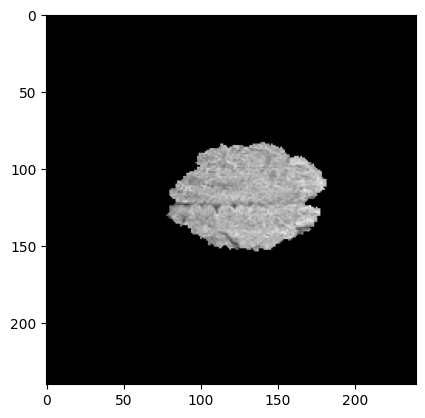

In [5]:
import matplotlib.pyplot as plt
plt.imshow(hor_cut,cmap='gray')
plt.show()

In [6]:
import cv2
import numpy as np

# Assuming you have a numpy array called 'image_array' containing your images

# Determine the dimensions of the images
height, width,time = data_array.shape
print(time)


# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can also use other codecs such as 'XVID', 'MJPG', etc.
fps = 24  # Frames per second
out = cv2.VideoWriter('output_video.mp4', fourcc, fps, (width, height),isColor=False)

# Write each image to the video file
for t in range(time):
    wiw=np.uint8(data_array[:,:,t])
    
    out.write(wiw)
    

# Release the VideoWriter object
out.release()
print("Video created successfully!")


155
Video created successfully!


In [13]:
def specific_gaussian(image):
# Define the region of interest (ROI)
# Example: selecting the top-left quarter of the image
    height, width = image.shape[:2]
    roi = (0, 0, int(width // 3.6), int(height // 3.6))
    mask = np.zeros_like(image[:, :])
    mask[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]] = 255
    blurred_roi = cv2.GaussianBlur(image[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]], (3, 3), 0)

    image_blurred = np.copy(image)
    image_blurred[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]] = blurred_roi
    return image_blurred

In [27]:
import numpy as np

def detect_high_value_pixels(image_array, threshold=0.1):
    height, width = image_array.shape
    result_array = np.zeros_like(image_array)

    # Iterate through each pixel in the image
    for y in range(height):
        for x in range(width):
            # Check the 9x9 neighborhood around the current pixel
            neighborhood = image_array[max(0, y-6):min(height, y+7), max(0, x-6):min(width, x+7)]
            # Calculate the mean of the neighborhood
            neighborhood_mean = np.mean(neighborhood)
            # If the mean is below the threshold, assign a high value to the result array
            if neighborhood_mean < threshold:
                result_array[y, x] = 0.5
    result_array=(result_array*255).astype(np.uint8)

    return result_array

# Example usage:
# Assuming img_array is your numpy array representing the image
# threshold can be adjusted according to your requirements
adding = detect_high_value_pixels(data_array[:,:,55], threshold=0.1)



In [28]:
final= data_array[:,:,55]+ adding

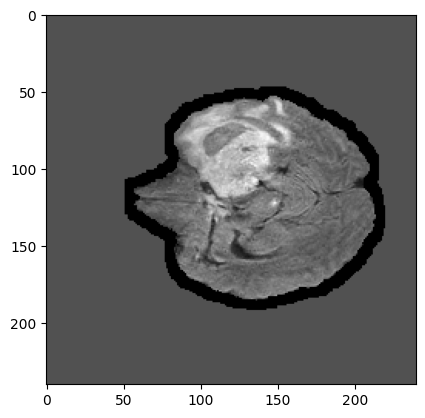

In [29]:
plt.imshow(final, cmap='gray')
plt.show()

In [30]:
def spacefill(data_array):
    new_data_array=np.zeros(data_array.shape)
    xmax,ymax,time=data_array.shape
    for t in range(time):
        new_data_array[:,:,t]=detect_high_value_pixels(data_array[:,:,t])+data_array[:,:,t]
    return new_data_array
    

In [31]:
space_filled=spacefill(data_array)


In [32]:
# Determine the dimensions of the images
def video_maker(name,data_array):
    height, width,time = data_array.shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = 24  # Frames per second
    out = cv2.VideoWriter(name+".mp4", fourcc, fps, (width, height),isColor=False)

# Write each image to the video file
    for t in range(time):
        wiw=np.uint8(data_array[:,:,t])
        out.write(wiw)
    out.release()
    print("Video created successfully!")

In [34]:
video_maker("space_filled",space_filled)

Video created successfully!


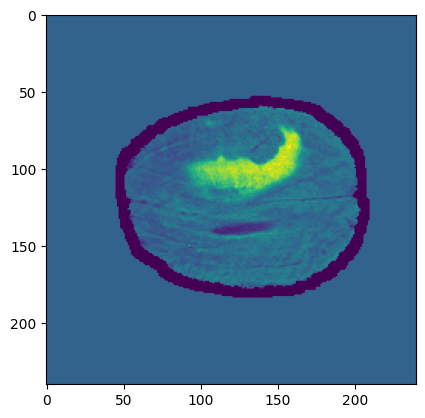

In [33]:
plt.imshow(space_filled[:,:,100])
plt.show()

In [35]:
import nibabel as nib
import numpy as np

# Assuming you have modified data_array extensively

# Create a new NIfTI image from the modified data array
new_img = nib.Nifti1Image(space_filled, img.affine)

# Save the new NIfTI image to a file
nib.save(new_img, 'spacefilled_data.nii')